# CUSTOMER SEGMENTATION 

### Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

### Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Problem Statement
You own the mall and want to understand the customers like who can be easily converge Target Customer so that the sense can be given to marketing team and plan the strategy accordingly.

# 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

# 2. Importing Dataset

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Data Exploration

In [3]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

##### Dataset description:
There are 200 entires of the supermarket customer demographic data. Here is a quick overview of the dataset columns:

1. CustomerID: the customer ID indexed by the membership system
2. Gender: the gender of the supermarket customer
3. Age: the age of the supermarket member
4. Annual Income (k$): the annual income of the customers with a unit of 1000 dollars
5. Spending Score (1-100): the spending score from 1-100. 100 means the customer is a active shopper

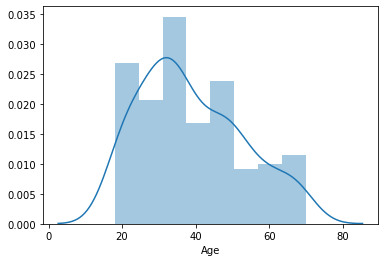

In [13]:
sns.distplot(df['Age'])

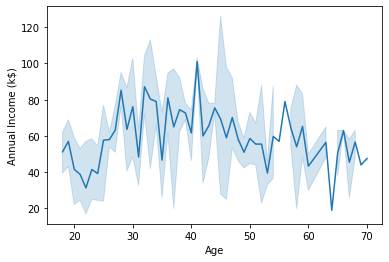

In [16]:
sns.lineplot(x='Age',y = 'Annual Income (k$)',data=df)

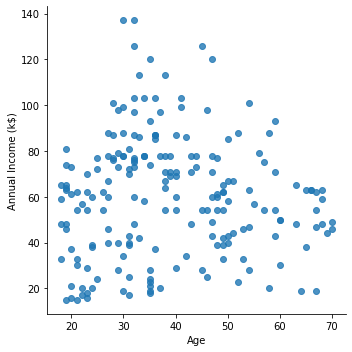

In [17]:
sns.lmplot('Age','Annual Income (k$)',data=df,fit_reg=False)

In [18]:
gender_spends_df = df.groupby('Gender').agg({'Annual Income (k$)':'mean','Spending Score (1-100)':'mean'}).reset_index()
gender_spends_df

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,59.250000,51.526786
1,Male,62.227273,48.511364


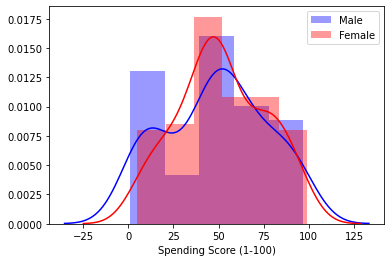

In [19]:
sns.distplot(df[df['Gender']=='Male']['Spending Score (1-100)'],
            color = 'b',
            label = 'Male')

sns.distplot(df[df['Gender']=='Female']['Spending Score (1-100)'],
            color = 'r',
            label = 'Female')
plt.legend()

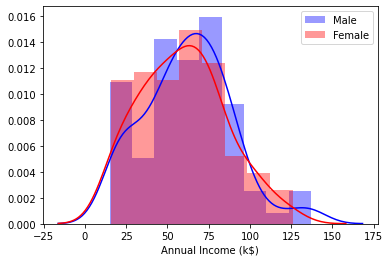

In [20]:
sns.distplot(df[df['Gender']=='Male']['Annual Income (k$)'],
            color = 'b',
            label = 'Male')

sns.distplot(df[df['Gender']=='Female']['Annual Income (k$)'],
            color = 'r',
            label = 'Female')
plt.legend()

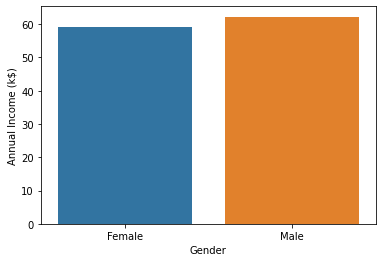

In [21]:
sns.barplot(x = 'Gender',y='Annual Income (k$)',data = gender_spends_df)


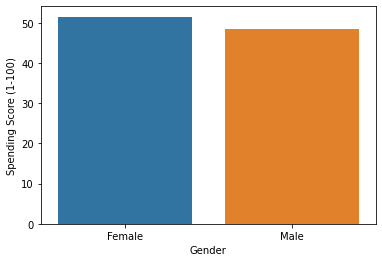

In [22]:
sns.barplot(x = 'Gender',y='Spending Score (1-100)',data = gender_spends_df)

### Normalising the Data

In [23]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

# 4. Data Analysis

### Elbow Curve Method

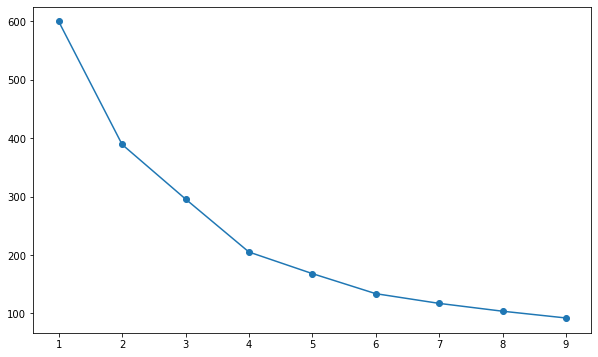

In [24]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(10,6))
plt.plot(cluster_range, cluster_errors,marker = "o")

In [25]:
k = 4
clusters = KMeans(k,random_state = 42)
clusters.fit(scaled_df)
df['cluster_id'] = clusters.labels_
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_id
66,67,Female,43,48,50,3
17,18,Male,20,21,66,1
195,196,Female,35,120,79,2
78,79,Female,23,54,52,1
65,66,Male,18,48,59,1


In [26]:
df.groupby(['cluster_id'])['Age','Annual Income (k$)','Spending Score (1-100)'].agg({'mean'}).reset_index()

,cluster_id,Age,Annual Income (k$),Spending Score (1-100)
,,mean,mean,mean
0,0,39.368421,86.500000,19.578947
1,1,25.438596,40.000000,60.298246
2,2,32.875000,86.100000,81.525000
3,3,53.984615,47.707692,39.969231


### First Cluster

In [27]:
cluster_0 = df[df['cluster_id']==0]
cluster_0_df = cluster_0.groupby('Gender').agg({'Spending Score (1-100)':'mean','Annual Income (k$)':'mean'}).reset_index()

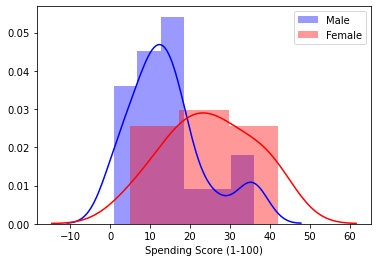

In [28]:
sns.distplot(cluster_0[cluster_0['Gender']=='Male']['Spending Score (1-100)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_0[cluster_0['Gender']=='Female']['Spending Score (1-100)'],
            color = 'r',
            label = 'Female')
plt.legend()

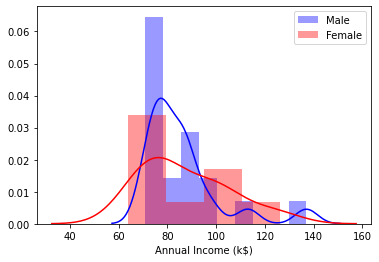

In [29]:
sns.distplot(cluster_0[cluster_0['Gender']=='Male']['Annual Income (k$)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_0[cluster_0['Gender']=='Female']['Annual Income (k$)'],
            color = 'r',
            label = 'Female')
plt.legend()

#####  Cluster 0 - Observation

1. Female and Male Earn almost the same.
2. Women has more Spending habits.
3. Average age of customers is 39 and Average Annual Income is $86K and spends is very less compared to their income.

### Second Cluster

In [30]:
cluster_1 = df[df['cluster_id']==1]
cluster_1_df = cluster_1.groupby('Gender').agg({'Spending Score (1-100)':'mean','Annual Income (k$)':'mean'}).reset_index()

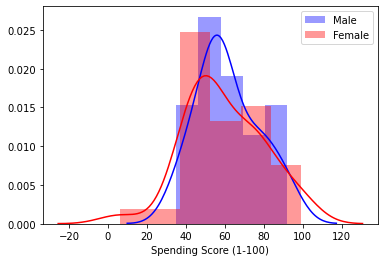

In [31]:
sns.distplot(cluster_1[cluster_1['Gender']=='Male']['Spending Score (1-100)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_1[cluster_1['Gender']=='Female']['Spending Score (1-100)'],
            color = 'r',
            label = 'Female')
plt.legend()

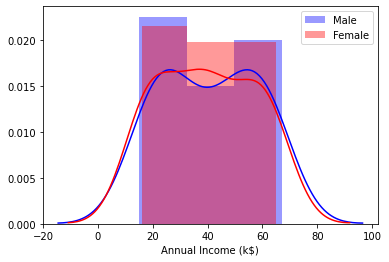

In [32]:
sns.distplot(cluster_1[cluster_1['Gender']=='Male']['Annual Income (k$)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_1[cluster_1['Gender']=='Female']['Annual Income (k$)'],
            color = 'r',
            label = 'Female')
plt.legend()

#### Cluster 1-Observation:

1. Spends and Income in this group is both similar for Male and Female
2. Average Age is 25yrs.
3. Income is lesser than their Spends.
4. Male income and Spends is slightly above Females.

### Third Cluster

In [33]:
cluster_2 = df[df['cluster_id']==2]
cluster_2_df = cluster_2.groupby('Gender').agg({'Spending Score (1-100)':'mean','Annual Income (k$)':'mean'}).reset_index()

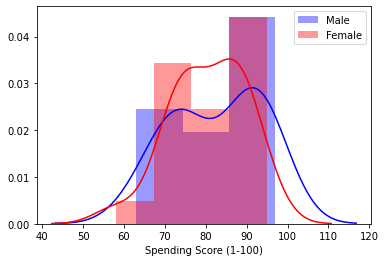

In [34]:
sns.distplot(cluster_2[cluster_2['Gender']=='Male']['Spending Score (1-100)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_2[cluster_2['Gender']=='Female']['Spending Score (1-100)'],
            color = 'r',
            label = 'Female')
plt.legend()

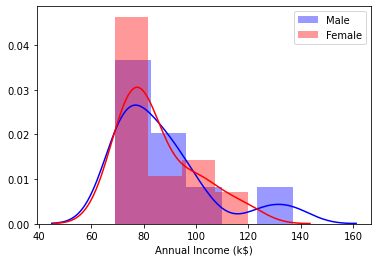

In [35]:
sns.distplot(cluster_2[cluster_2['Gender']=='Male']['Annual Income (k$)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_2[cluster_2['Gender']=='Female']['Annual Income (k$)'],
            color = 'r',
            label = 'Female')
plt.legend()

#### Cluster-2 Observation:

1. Average age for this group is 33
2. Annual Income is high for this group and so is the Spending Score.
3. We observe that the Spends and Income of Males is slightly higher than Women.
4. Average Income is slightly higher than Average Spends

### Fourth Cluster

In [36]:
cluster_3 = df[df['cluster_id']==3]
cluster_3_df = cluster_3.groupby('Gender').agg({'Spending Score (1-100)':'mean','Annual Income (k$)':'mean'}).reset_index()


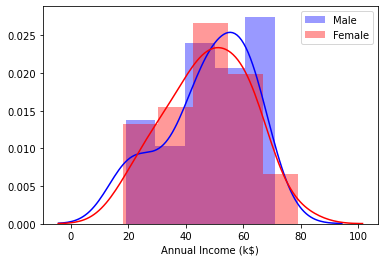

In [37]:
sns.distplot(cluster_3[cluster_3['Gender']=='Male']['Annual Income (k$)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_3[cluster_3['Gender']=='Female']['Annual Income (k$)'],
            color = 'r',
            label = 'Female')
plt.legend()

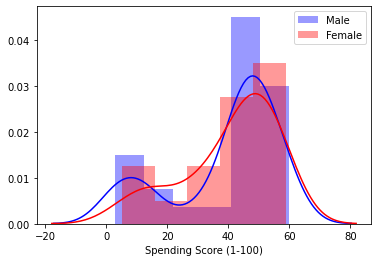

In [38]:
sns.distplot(cluster_3[cluster_3['Gender']=='Male']['Spending Score (1-100)'],
            color = 'b',
            label = 'Male')

sns.distplot(cluster_3[cluster_3['Gender']=='Female']['Spending Score (1-100)'],
            color = 'r',
            label = 'Female')
plt.legend()

#### Cluster-3 Observation:

1. Average age of customers is 53
2. The number of customers in this category is 65.
3. The average income and Spends is medium.
4. Males annual income is slighlty higher and Spends a bit lower compared to Females.